In [98]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import csv
import pandas as pd
from tqdm import tnrange, tqdm
from datetime import datetime

In [99]:
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=(N,N))-1
    for i in range(N):
        state[0,i] = -1
        state[N-1,i] = 1
    return state

def mcmove(config, beta, h):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                if a == len(config):
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] - h
                    cost = 2*s*nb
                elif a == 0:
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] + h
                    cost = 2*s*nb
                else :
                    s =  config[a, b]
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                if cost < 0:	
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config, h):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            if i == len(config):
                S = config[i,j]
                nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] + h
                energy += -nb*S
            elif i == 0:
                S = config[i,j]
                nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] - h
                energy += -nb*S
            else :
                S = config[i,j]
                nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] 
                energy += -nb*S
    return energy/4.


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

In [120]:
## change these parameters for a smaller (faster) simulation 
## nt      = 100         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 10000       #  number of MC sweeps for equilibration
mcSteps = 10000       #  number of MC sweeps for calculation
h = 0               #  external field
T_critical = 2.25


T = 0.75*T_critical; 
E,M,C,X = 0, 0, 0, 0
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [101]:
#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------

E1 = M1 = E2 = M2 = 0
config = initialstate(N)
iT=1.0/T; iT2=iT*iT;

for i in range(eqSteps):         # equilibrate
    mcmove(config, iT, h)           # Monte Carlo moves

for i in range(mcSteps):
    mcmove(config, iT, h)           
    Ene = calcEnergy(config, h)     # calculate the energy
    Mag = calcMag(config)        # calculate the magnetisation

    E1 = E1 + Ene
    M1 = M1 + Mag
    M2 = M2 + Mag*Mag 
    E2 = E2 + Ene*Ene

E = n1*E1
M = n1*M1
C = (n1*E2 - n2*E1*E1)*iT2
X = (n1*M2 - n2*M1*M1)*iT

print(E,M,C,X)

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1 -1]
 [-1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1]
 [ 1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1]
 [-1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1 -1  1  1]
 [-1  1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1]
 [-1  1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1]
 [-1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1]
 [-1  1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1]
 [-1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1]
 [-1  1  1 -1  1 -1  1 -1 -1  1 -1  1  1 -1  1  1]
 [ 1 -1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1]
 [-1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]]
-0.95022265625 -0.9707320312500001 0.08447126337448907 0.0685605213889007


In [102]:
#f = plt.figure(figsize=(18, 10)); # plot the calculated values    

#sp =  f.add_subplot(2, 2, 1 );
#plt.scatter(T, E, s=50, marker='o', color='IndianRed')
#plt.xlabel("Temperature (T)", fontsize=20);
#plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

#sp =  f.add_subplot(2, 2, 2 );
#plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
#plt.xlabel("Temperature (T)", fontsize=20); 
#plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

#sp =  f.add_subplot(2, 2, 3 );
#plt.scatter(T, C, s=50, marker='o', color='IndianRed')
#plt.xlabel("Temperature (T)", fontsize=20);  
#plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

#sp =  f.add_subplot(2, 2, 4 );
#plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
#plt.xlabel("Temperature (T)", fontsize=20); 
#plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

In [1]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import csv
import pandas as pd
from tqdm import tnrange, tqdm
from datetime import datetime

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta, h):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(1, N-1)
                    b = np.random.randint(0, N)
                    if a == len(config) :
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] - h 
                        cost = 2*s*nb
                    elif a == 0:
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] + h 
                        cost = 2*s*nb
                    else :
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                        cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config  
    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        N = 64        # Initialse the lattice
        h = 0
        N_intermediate_points = 10       #  number of temperature points
        T_min = 1.25                         #  lower range for temperature
        T_max = 2.10                         #  upper range for temperature
        T = np.linspace(T_min, T_max, N_intermediate_points);      #divisions T min and T max into different temperature steps 
        
        average_height_different_temperature = []
        
        config = 2*np.random.randint(2, size=(N,N))-1
        for i in range(N):
            config[0,i] = -1
            config[N-1,i] = 1
        #f = plt.figure(figsize=(15, 15), dpi=80);    
        #self.configPlot(f, config, 0, N, 1);
        
        msrmnt = 10001
        for l in range(len(T)):
            
            Lattice_number = []
            average_height_per_column = []
            average_height_film = 0
            square_average_height_per_column = []
            square_average_height_film = 0
        
            for i in range(N):
                average_height_per_column.append(0)
                square_average_height_per_column.append(0)
                Lattice_number.append(i+1)
            
            for i in range(msrmnt):
                self.mcmove(config, N, 1.0/T[l], h)
            
                if 0.2*msrmnt<i<msrmnt:
                    for j in range(N):
                        count = 0
                        for k in range(N-2):
                            if config[N-k-1,j] == -1 and config[N-k-2,j] == -1 and config[N-k-3,j] == -1 :
                                count = N - k
                                break
                            
                        average_height_per_column[j] = average_height_per_column[j] + (count)
                        square_average_height_per_column[j] = square_average_height_per_column[j] + (count**2)
            
                #if i == 1:       self.configPlot(f, config, i, N, 2);
                #if i == 4:       self.configPlot(f, config, i, N, 3);
                #if i == 32:      self.configPlot(f, config, i, N, 4);
                #if i == 100:     self.configPlot(f, config, i, N, 5);
                #if i == 1000:     self.configPlot(f, config, i, N, 6);
                #if i == 2000:     self.configPlot(f, config, i, N, 7);
                #if i == 5000:     self.configPlot(f, config, i, N, 8);
                #if i == 10000:     self.configPlot(f, config, i, N, 9);
            
        
            for j in range(N):
                average_height_per_column[j] = round(((average_height_per_column[j])/(0.8*(msrmnt-1))), 3)
                square_average_height_per_column[j] = round(((square_average_height_per_column[j])/(0.8*(msrmnt-1))), 3)
            
            sum_1 = 0.0
            sum_2 = 0.0
        
            for j in range(N):
                sum_1 += average_height_per_column[j]
                sum_2 += square_average_height_per_column[j]
            
            average_height_film = (sum_1)/N
            square_average_height_film = (sum_2)/N
            average_height_different_temperature.append(average_height_film)
            

            #print("An array of the average height per column is given below:-")
            #print("----")
            #print(average_height_per_column)
            #print("----")
            #print("An array of the squared average height per column is given below:-")
            #print("----")
            #print(square_average_height_per_column)
            #print("----")
            #print("The average height of the film = %0.2f" %average_height_film)
            #print("----")
            #print("The squared average height of the film = %0.2f" %square_average_height_film)
        
            #f = plt.figure(figsize=(6, 4)); # plot the calculated values    

            #sp =  f.add_subplot(1, 1, 1 );
            #plt.scatter(Lattice_number, average_height_per_column, s=50, marker='o', color='IndianRed')
            #plt.xlabel("Lattice number", fontsize=20);
            #plt.ylabel("average height per column", fontsize=20);         #plt.axis('tight');
        
        f = plt.figure(figsize=(15, 10)); # plot the calculated values    

        sp =  f.add_subplot(1, 1, 1 );
        plt.scatter(T, average_height_different_temperature, s=50, marker='o', color='RoyalBlue')
        plt.xlabel("Temperature", fontsize=20);
        plt.ylabel("Average Height of Film", fontsize=20);         #plt.axis('tight');

    
    

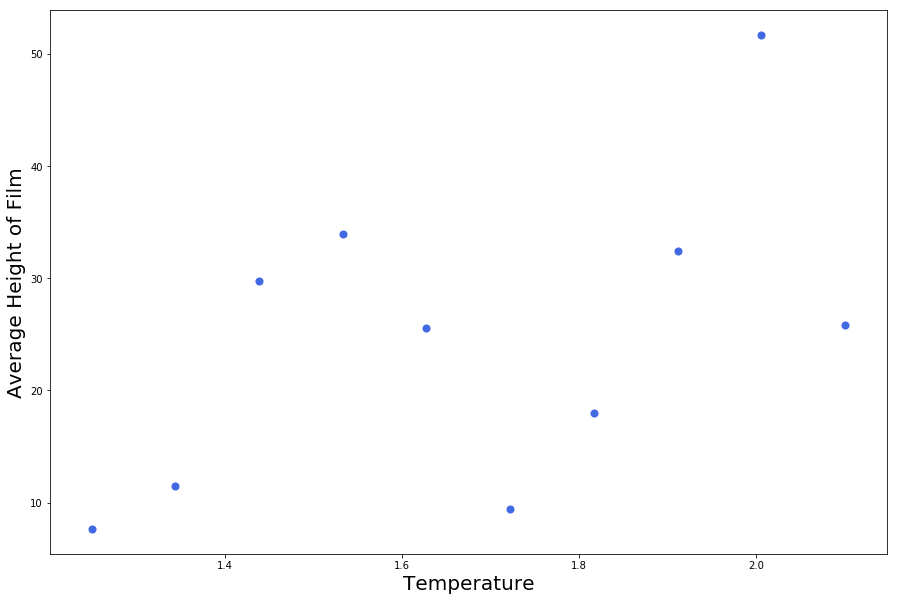

In [2]:
rm = Ising()
rm.simulate()